In [39]:
import shutil
import os
import random

In [41]:
original_dir = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Original"
pixelated_dir = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Pixelated"
test_folder = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Working\test"

In [43]:
os.makedirs(test_folder, exist_ok=True)

def copy_images(source_dir, destination_dir, num_images):
    images = os.listdir(source_dir)
    selected_images = random.sample(images, num_images)
    for image_name in selected_images:
        source_path = os.path.join(source_dir, image_name)
        destination_path = os.path.join(destination_dir, image_name)
        shutil.copyfile(source_path, destination_path)

num_images_per_category = 15  
copy_images(original_dir, test_folder, num_images_per_category)
copy_images(pixelated_dir, test_folder, num_images_per_category)

print(f"{num_images_per_category} original and {num_images_per_category} pixelated images copied to the test folder.")

15 original and 15 pixelated images copied to the test folder.


In [69]:
def preprocess_image(image_path, img_height=96, img_width=96):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

In [73]:
test_image_path = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Pixelated\school_84.jpg"


In [79]:
!pip install Pillow


In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path, img_height=96, img_width=96):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)  # Add batch dimension


In [5]:
test_image_path = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Pixelated\school_84.jpg"


In [9]:
from PIL import Image
input_img = preprocess_image(test_image_path)


In [15]:
from tensorflow.keras.models import load_model

model_path = r"C:\Users\betti\Downloads\Mini_project_Image\edsr_model.keras"
model = load_model(model_path)

In [17]:
output_img = model.predict(input_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


In [23]:
def show_images(original_img_path, predicted_img_array):
    original = image.load_img(original_img_path)
    original = image.img_to_array(original) / 255.0
    predicted = predicted_img_array[0]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Enhanced')
    plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13908562..0.8050724].


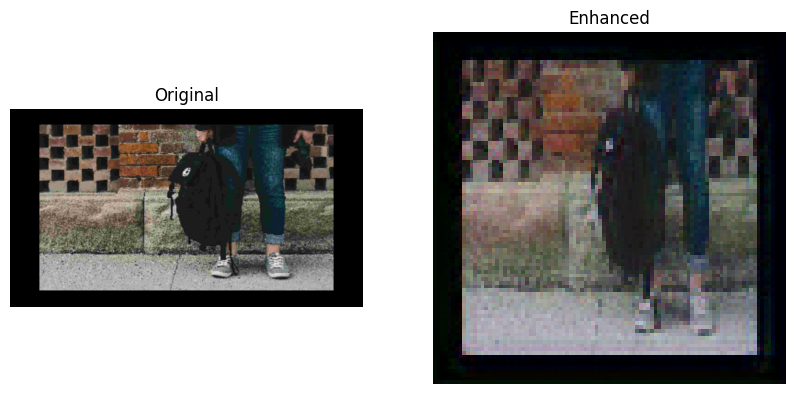

In [37]:
import matplotlib.pyplot as plt

show_images(test_image_path, output_img)

In [39]:
output_img = output_img[0]
output_img = (output_img * 255.0).astype(np.uint8)
output_image = Image.fromarray(output_img)
output_image_path = r"C:\Users\betti\Downloads\Mini_project_Image\Enhanced_school_84.jpg"
output_image.save(output_image_path)


In [41]:
print(f" Enhanced image saved at: {output_image_path}")

 Enhanced image saved at: C:\Users\betti\Downloads\Mini_project_Image\Enhanced_school_84.jpg


In [43]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from sklearn.metrics import classification_report

# Load the EDSR model
edsr_model_path = r"C:\Users\betti\Downloads\Mini_project_Image\edsr_model.h5"  # Adjust with your actual path
edsr_model = load_model(edsr_model_path)

# Test dataset directory (for image correction task)
test_folder = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Working\test"  # Adjust with your actual path

# Load dataset efficiently
batch_size = 32
img_height = 224
img_width = 224

test_ds = image_dataset_from_directory(
    test_folder,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Get true labels
true_labels = np.concatenate([y.numpy() for _, y in test_ds])

# Normalize images
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Predict batch-wise
predictions = edsr_model.predict(test_ds)
predictions = predictions.flatten()  # Convert to 1D array

# Assign class labels
threshold = 0.8  # You can adjust this threshold based on your desired criteria
predicted_labels = [1 if pred >= threshold else 0 for pred in predictions]  # 1: Pixelated, 0: High resolution

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["High resolution", "Pixelated"])
print(report)

ModuleNotFoundError: No module named 'sklearn'